# Calcium Oscillation Modelling

## Model description

#### Model Overview

This article introduces a two-chamber model for explaining the dynamics of calcium ions (Ca²⁺) in frog skeletal muscle fibers.

#### Description

- **Two-chamber model:** The model consists of two compartments, the sarcoplasmic reticulum (SR) and the cytoplasm, with the muscle fibers located in the cytoplasm.
- **Ca²⁺ binding proteins:** The model simulates various Ca²⁺ binding proteins in the cytoplasm, including troponin, calsequestrin, and potentially added exogenous buffers (such as EGTA or BAPTA). The primary calcium binding protein considered in the SR is calsequestrin (CSQ), with its characteristics modeled based on experimental data.
- **R calcium buffering:** The buffering effect of Ca²⁺ in the SR exhibits cooperativity, following the Hill equation. Parameters such as the total number of Ca²⁺ binding sites and the half-saturation concentration change with the initial Ca²⁺ concentration in the SR.
- **Calcium release mechanism:** The calcium release from the SR is activated by a voltage-dependent mechanism, achieved by increasing the Ca²⁺ permeability of the SR membrane.

#### Key Features

- **Voltage-activated Ca²⁺ permeability:** The model uses experimentally obtained permeability time courses and amplitudes to drive the simulation.
- **Ca²⁺ buffering system:** The characteristics of the Ca²⁺ buffering system in the SR change under low initial [Ca²⁺]SR conditions, exhibiting a higher buffering capacity.
- **Experimental validation:** The model successfully reproduces the transient changes of Ca²⁺ in the SR and cytoplasm observed in experiments.

## Model Equations

Table 1: Variables used in the model.

| Name                           |                         Description                          |
| :----------------------------- | :----------------------------------------------------------: |
| [Ca<sup>2+</sup>]              |       Free Calcium concentration in the cytoplasm (1)        |
| D                              |                 Cytoplasmic Dye (Rhod2) (1)                  |
| CaD                            |                 Ca bound Cytoplasmic Dye (1)                 |
| B                              | extrinsic Ca buffer in the cytoplasm (either EGTA or BAPTA)(1) |
| CaB                            |            Ca bound extrinsic buffer cytoplasm(1)            |
| Trop                           |                         Troponin (1)                         |
| CaTrop                         |                    Ca bound Troponin (1)                     |
| Parv                           |                       Parvalbumin (1)                        |
| MgParv                         |                 Parvalbumin bound to Mg (1)                  |
| CaParv                         |                 Parvalbumin bound to Ca (1)                  |
| R                              |                   Calcium Release Flux (2)                   |
| PF                             |                       Ca Pump Flux (2)                       |
| L                              |               SR Ca<sup>2+</sup> Leak Flux (2)               |
| [Ca<sup>2+</sup>]<sub>SR</sub> |           Free Calcium concentration in the SR (3)           |
| F                              |                Dye in the SR (Mag Fluo4) (3)                 |
| CaF                            |                     Ca bound SR Dye (3)                      |
| CSQ                            |                      Calsequestrin (3)                       |
| CaCSQ                          |               Calcium bound Calsequestrin (3)                |

---

> (1) All concentrations in $\mathrm{\mu M}$, referred to cytoplasmic volume.
> 
> (2) Change of concentration per unit time in $\mathrm{\mu M/ms}$, referred to cytoplasmic volume.
>
> (3) All concentrations in $\mathrm{\mu M}$, referred to SR volume
>

---

### A simple model for intra SR [Ca²⁺] transients.

From Fick's First Law:

$$
\frac{d[Ca^{2+}]_{\mathrm{SR}}}{dt} = P\ A \frac{[Ca^{2+}]_{C^-} - [Ca^{2+}]_{\mathrm{SR}}}{V_{\mathrm{SR}}} \tag{1}
$$

A simplifying assumption in the following treatment is that no Ca2+ comes into or leaves the cell through the plasma membrane. Under this condition the total Ca content of the cell is constant. Thus, it holds at any time that the sum of the concentration times the volume of the compartments is constant. Calling M to this quantity, it is given by equation (2):

$$
M = [Ca^{2+}]_{C^-} V_{C^-} + [Ca^{2+}]_{\mathrm{SR}} V_{\mathrm{SR}} \tag{2}
$$

where $V_{C^-}$ and $V_{\mathrm{SR}}$ are the volumes of the cytoplasm and the SR, respectively. The volume of the cytoplasm is assumed to be constant, while the volume of the SR is assumed to be constant as well. The total volume of the cell is given by $V_{C^-} + V_{\mathrm{SR}}$.

Writing $[Ca^{2+}]_{C^-}$ in terms of $[Ca^{2+}]_{\mathrm{SR}}$ yields, we can get that:

$$
[Ca^{2+}]_{C^-} = \frac{M - [Ca^{2+}]_{\mathrm{SR}} V_{\mathrm{SR}}}{V_{C^-}} \tag{3}
$$

Substituting this into equation (1) gives:

$$
\frac{d[Ca^{2+}]_{\mathrm{SR}}}{dt} = P\ A \frac{\frac{M - [Ca^{2+}]_{\mathrm{SR}} V_{\mathrm{SR}}}{V_{C^-}} - [Ca^{2+}]_{\mathrm{SR}}}{V_{\mathrm{SR}}} \tag{4}
$$

Rearranging yields, we can get a first order linear differential equation for the SR calcium concentration:

$$
\frac{d[Ca^{2+}]_{\mathrm{SR}}}{dt} = \frac{P\ A}{V_{\mathrm{SR}}} \frac{M}{V_{C^-}} - P\ A \frac{\left( V_\mathrm{C} + V_{\mathrm{SR}}\right) [Ca^{2+}]_{\mathrm{SR}}}{V_{\mathrm{C}} V_{\mathrm{SR}}} \tag{5}
$$

We can use `Python` to get the solution of the equation (5) with the initial condition $[Ca^{2+}]_{\mathrm{SR}}(0) = 0$, and its exponential solution.


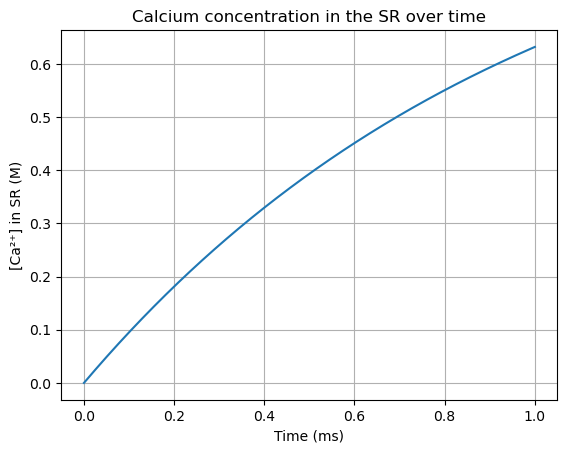

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Model parameters
P = 1.0e-3  # Permeability of the SR membrane (1/ms)
A = 1.0e-6  # Area of the SR membrane (cm^2)
V_SR = 1.0e-9  # Volume of the SR (cm^3)
V_C = 1.0e-6  # Volume of the cytoplasm (cm^3)
M = 1.0e-6  # Total calcium content (M)
t = np.linspace(0, 1, 1000)  # Time vector (ms)

# Define the differential equation
def dCaSR(CaSR, t, P, A, V_SR, V_C, M):
    dCaSR_dt = (P * A / V_SR) * (M / V_C) - (P * A * (V_C + V_SR) * CaSR) / (V_C * V_SR)
    return dCaSR_dt

# Initial condition
CaSR0 = 0.0
# Solve the differential equation
CaSR = odeint(dCaSR, CaSR0, t, args=(P, A, V_SR, V_C, M))

# Plot the results
plt.plot(t, CaSR)
plt.title('Calcium concentration in the SR over time')
plt.xlabel('Time (ms)')
plt.ylabel('[Ca²⁺] in SR (M)')
plt.grid()
plt.show()
